# Analysis of Unstable Waveforms 
## Look for common CTG error patterns of 'half counting' and 'double counting'

- Half Counting - Counting every eother beat
- Double counting - Sub-beat spacing (perhaps tied to artifacts within heart beat) 

In [1]:
import pickle
import os
from os.path import sep
import sys
from pprint import pprint

import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

# Configuration

### Select PC or Mac
usePc:
    
- True: Uses Windows Surface Pro
- False:  Uses Mac (Doug's  development Laptop)

In [2]:
usePc = False

### Recording set to use

use_user_2:
- False:  Uses Malawi_ctg_db     (Monica's User 1 dataset)
- True: Malawi_ctg_db_user2      (Monica's User 2 dataset)

In [3]:
use_user_2 = True

# Apply configuration

In [4]:
if usePc:
    if use_user_2:
        path = 'c:\Users\Dtree\Documents\ctg_db'
    else:
        path = 'c:\Users\Dtree\Documents\ctg_db'
else:
    if use_user_2:
        path = '/Users/doug/Documents/GitHub/Malawi_ctg_db_user2'
    else:
        path = '/Users/doug/Documents/GitHub/Malawi_ctg_db'

In [5]:
if use_user_2:
    examples = [
        ['October 9, 2018, Pt C -- 10.9',
        '8ca99f08-e8ad-44f1-87f6-ca242b2ad9ce/a56f2004-003e-4b3d-8639-c26cf3217a12'],
    ]
else:
    examples = [
        ['October 5, 2018, Pt C (8.9 min)',
        'f65f75a5-2c68-4bd0-9f85-2d2fbc5b5db5/c0a0c86c-e059-4383-94ee-ec0ee9fa52d6'],
        ['October 5, 2018, Pt B (8.1 min)',
        '6499e167-2785-4ec2-83a0-33b4d132abac/411f3ed3-c437-4c77-a043-fce8253d9579'],
        ['October 5, 2018, Pt B (6.3 min)',
        '6499e167-2785-4ec2-83a0-33b4d132abac/aff4fb71-f7d4-434c-8f66-603ab712e41d'],
    ]

## Raw Signals

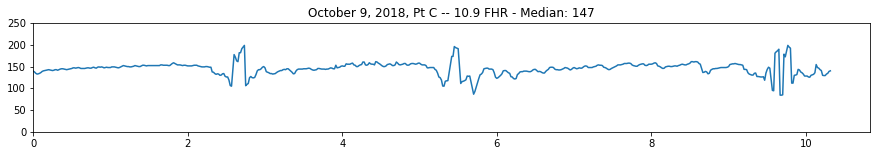

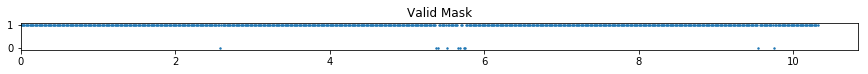


----------------------------------------



In [6]:
for name, entry in examples:
    with open(path+sep+entry+'.p', 'r') as f:
        data = pickle.load(f)
    
    hr = data['combined']['hr']
    pos = data['combined']['pos']/60.0
    valid = data['combined']['valid']
    base = np.median(hr[valid])
      
    plt.figure(figsize=(15, 2))
    plt.title('{} FHR - Median: {:0.0f}'.format(name, base))
    plt.plot(pos[valid], hr[valid])
    plt.xlim(0, )
    plt.ylim(0, 250)
    plt.show()
    
    plt.figure(figsize=(15, 0.5))
    plt.title('Valid Mask')
    plt.scatter(pos, valid, s=2)
    plt.xlim(0, )
    plt.ylim(-0.1, 1.1)
    plt.show()
    
    print
    print '-'*40
    print
    

## Comparison of Signals With Levels at 0.5, 1.5 and 2x Median

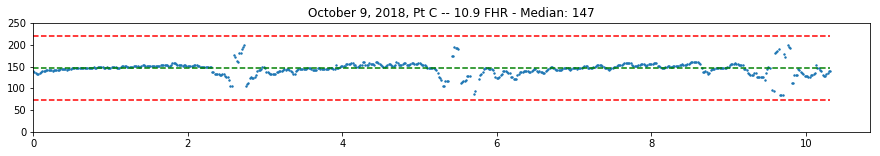

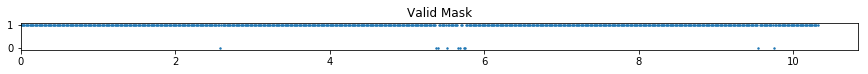


----------------------------------------



In [7]:
for name, entry in examples:
    with open(path+sep+entry+'.p', 'r') as f:
        data = pickle.load(f)
    
    hr = data['combined']['hr']
    pos = data['combined']['pos']/60.0
    valid = data['combined']['valid']
    base = np.median(hr[valid])
      
    plt.figure(figsize=(15, 2))
    plt.title('{} FHR - Median: {:0.0f}'.format(name, base))
    plt.scatter(pos[valid], hr[valid], s=2)
    plt.plot([pos[0], pos[-1]], [base, base], 'g--')
    plt.plot([pos[0], pos[-1]], [2*base, 2*base], 'r--')
    plt.plot([pos[0], pos[-1]], [1.5*base, 1.5*base], 'r--')
    plt.plot([pos[0], pos[-1]], [0.5*base, 0.5*base], 'r--')
    plt.xlim(0, )
    plt.ylim(0, 250)
    plt.show()
    
    plt.figure(figsize=(15, 0.5))
    plt.title('Valid Mask')
    plt.scatter(pos, valid, s=2)
    plt.xlim(0, )
    plt.ylim(-0.1, 1.1)
    plt.show()
    
    print
    print '-'*40
    print
    

## Normalized View of Signal vs  Levels at 0.5, 1.5 and 2x Median

- Solid red lines at 0.5, 1.5 and 2x Median
- Proposed Thresholds - dashed red lines at 0.6 and 1.4x Median

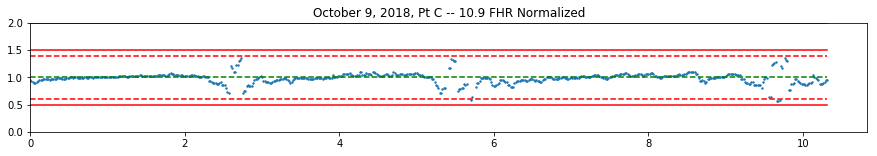

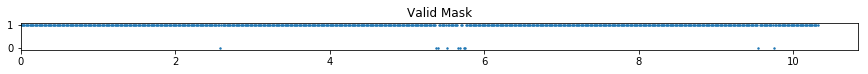


----------------------------------------



In [8]:
for name, entry in examples:
    with open(path+sep+entry+'.p', 'r') as f:
        data = pickle.load(f)

    hr = data['combined']['hr']
    pos = data['combined']['pos']/60.0
    valid = data['combined']['valid']
    base = np.median(hr[valid])

    plt.figure(figsize=(15, 2))
    plt.title('{} FHR Normalized'.format(name))
    plt.scatter(pos[valid], hr[valid]/base, s=2)
    plt.plot([pos[0], pos[-1]], [1, 1], 'g--')
    plt.plot([pos[0], pos[-1]], [2, 2], 'r')
    plt.plot([pos[0], pos[-1]], [1.5, 1.5], 'r')
    plt.plot([pos[0], pos[-1]], [1.4, 1.4], 'r--')
    plt.plot([pos[0], pos[-1]], [0.6, 0.6], 'r--')
    plt.plot([pos[0], pos[-1]], [0.5, 0.5], 'r')
    plt.xlim(0,)
    plt.ylim(0, 2)
    plt.show()
    
    plt.figure(figsize=(15, 0.5))
    plt.title('Valid Mask')
    plt.scatter(pos, valid, s=2)
    plt.xlim(0, )
    plt.ylim(-0.1, 1.1)
    plt.show()
    
    print
    print '-'*40
    print
    

## Try to Identify Errors

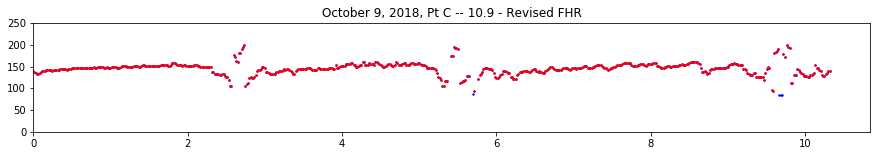

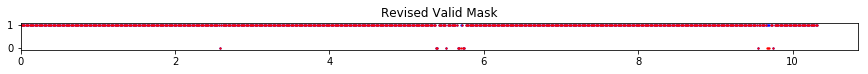


----------------------------------------



In [9]:
for name, entry in examples:
    with open(path+sep+entry+'.p', 'r') as f:
        data = pickle.load(f)
    
    hr = data['combined']['hr']
    pos = data['combined']['pos']/60.0
    valid = data['combined']['valid']
    base = np.median(hr[valid])
      
    newValid = np.copy(valid)
    newValid[hr>1.4*base] = 0
    newValid[hr<0.6*base] = 0
    newHr = np.copy(hr)
    newHr[newValid == 0] = 0
    
    plt.figure(figsize=(15, 2))
    plt.title('{} - Revised FHR'.format(name))
    plt.scatter(pos[valid], hr[valid], s=2, c='b')
    plt.scatter(pos[newValid], hr[newValid], s=2, c='r')
    plt.xlim(0, )
    plt.ylim(0, 250)
    plt.show()
    
    plt.figure(figsize=(15, 0.5))
    plt.title('Revised Valid Mask')
    plt.scatter(pos, valid, s=1.5, c='b')
    plt.scatter(pos, newValid, s=1.5, c='r')
    plt.xlim(0, )
    plt.ylim(-0.1, 1.1)
    plt.show()
    
    
    print
    print '-'*40
    print
    

## Before and After

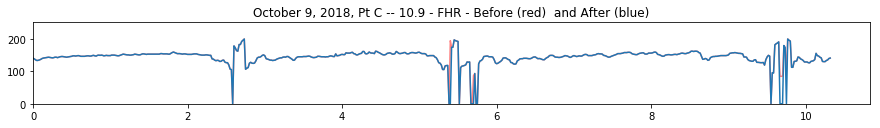

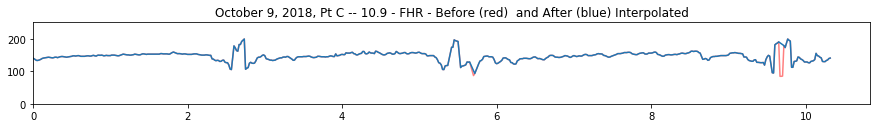

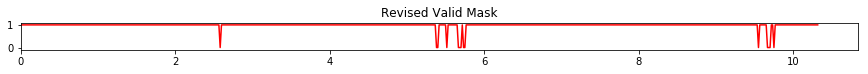


----------------------------------------



In [10]:
for name, entry in examples:
    with open(path+sep+entry+'.p', 'r') as f:
        data = pickle.load(f)
    
    hr = data['combined']['hr']
    pos = data['combined']['pos']/60.0
    valid = data['combined']['valid']
    base = np.median(hr[valid])
      
    newValid = np.copy(valid)
    newValid[hr>1.4*base] = 0
    newValid[hr<0.6*base] = 0
    newHr = np.copy(hr)
    newHr[newValid == 0] = 0
    
    plt.figure(figsize=(15, 1.5))
    plt.title('{} - FHR - Before (red)  and After (blue)'.format(name))
    plt.plot(pos, hr, 'r', alpha=0.5)
    plt.plot(pos, newHr)
    plt.xlim(0, )
    plt.ylim(0, 250)
    plt.show()
    
    plt.figure(figsize=(15, 1.5))
    plt.title('{} - FHR - Before (red)  and After (blue) Interpolated'.format(name))
    plt.plot(pos[valid], hr[valid], 'r', alpha=0.5)
    plt.plot(pos[newValid], newHr[newValid])
    plt.xlim(0, )
    plt.ylim(0, 250)
    plt.show()
    
    plt.figure(figsize=(15, 0.5))
    plt.title('Revised Valid Mask')
    plt.plot(pos, newValid, c='r')
    plt.xlim(0, )
    plt.ylim(-0.1, 1.1)
    plt.show()
    
    print
    print '-'*40
    print
    